In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

In [2]:
#   collect
df = pd.read_csv('world-happiness-report-2021.csv')
columns = ['Country name', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
           'Generosity', 'Perceptions of corruption', 'Ladder score']
data = df[columns]
print(f'Rows: {data.shape[0]} | Columns: {data.shape[1]}')

Rows: 149 | Columns: 7


In [3]:
#   EDA
df[columns].corr().to_csv('corrs.csv')
x = data.iloc[:, 1:2].values
y = data.iloc[:, 2:3].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=.8)

In [4]:
#   linear reg - social support predicting life expectancy score
reg = LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)

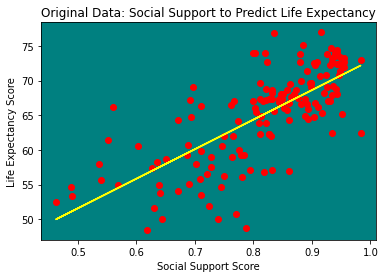

In [5]:
#   Original data linear regression social support life expectancy
ax = plt.axes()
ax.scatter(x, y, color='red')
ax.plot(x, y_pred, color='yellow')
ax.set_title('Original Data: Social Support to Predict Life Expectancy')
ax.set_xlabel('Social Support Score')
ax.set_ylabel('Life Expectancy Score')
ax.set_facecolor('teal')
plt.show()

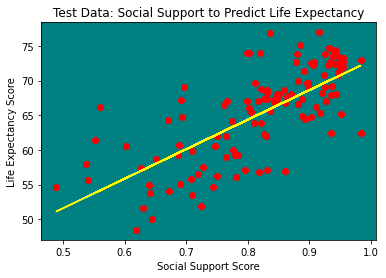

R^2 Linear Regression = 0.52


In [10]:
#   Test data linear regression
ax1 = plt.axes()
ax1.scatter(x_test, y_test, color='red')
ax1.plot(x_test, reg.predict(x_test), color='yellow')
ax1.set_title('Test Data: Social Support to Predict Life Expectancy')
ax1.set_xlabel('Social Support Score')
ax1.set_ylabel('Life Expectancy Score')
ax1.set_facecolor('teal')
plt.show()
score = r2_score(y_test, reg.predict(x_test))
print(f'R^2 Linear Regression = {round(score, 2)}')

In [7]:
#   do multi regression all x's predicting ladder score, measure goodness of fit, accuracy score
x_multi = data.iloc[:, 1:-1].values
y_multi = data.iloc[:, -1].values
x_multi_train, x_multi_test, y_multi_train, y_multi_test = train_test_split(x_multi, y_multi, test_size=.8, random_state=0)

reg_multi = LinearRegression()
reg_multi.fit(x_multi, y_multi)
y_multi_pred = reg_multi.predict(x_multi_test)
result = np.concatenate((y_multi_pred.reshape(len(y_multi_pred), 1), y_multi_test.reshape(len(y_multi_test), 1)), 1)
score_multi = r2_score(y_multi_test, y_multi_pred)
print(f'R^2 Multi Linear Regression = {round(score_multi, 2)}')

R^2 Multi Linear Regression = 0.73


In [8]:
#   happiest countries according to ladder score
top_ladder = df[columns].sort_values(by='Ladder score', ascending=False).head(20)

countries_and_score = top_ladder.loc[:, ['Country name', 'Ladder score']]
x_bar = countries_and_score.iloc[:, 0].values
y_bar = countries_and_score.iloc[:, 1].values


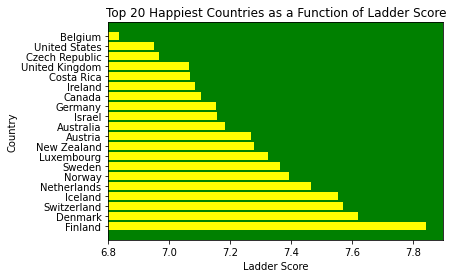

In [9]:
#   top 20 happiest countries according to ladder score
ax3 = plt.axes()
ax3.barh(x_bar, y_bar, color='yellow')
ax3.set_xlim(6.8, 7.9)
ax3.set_title('Top 20 Happiest Countries as a Function of Ladder Score')
ax3.set_xlabel('Ladder Score')
ax3.set_ylabel('Country')
ax3.set_facecolor('green')
plt.show()